In [38]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [23]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## EDA on Training Dataset

### For numeric data
1. Made histograms to understand distributions
2. Corrplot
3. Pivot table comparing survival rate across numeric variables

### For Categorical Data
1. Made bar charts to understand balance of classes
2. Made pivot tables to understand relationship with survival

In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
### training set has 891 entries
df_train.shape

(891, 12)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df_train.describe(include = 'all')
### from this table, we can see that average survive rate is around 40%. This means more people died after the disaster within this training set. 
### we can also see that the average age is 29 and median is 28. This means that the training set population's distribution is very close to normal distribution

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Strom, Miss. Telma Matilda",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [24]:
df_train.isnull().sum()
### checking the null on each column. Age, Cabin, and Embarked column has null entries

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df_cat = df_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [36]:
df_num = df_train[['Age', 'SibSp', 'Parch', 'Fare']]

### Made histograms to understand distributions

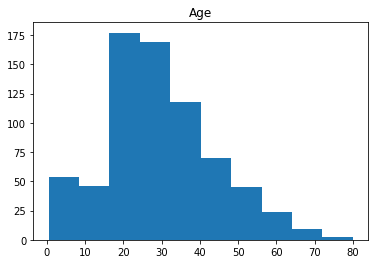

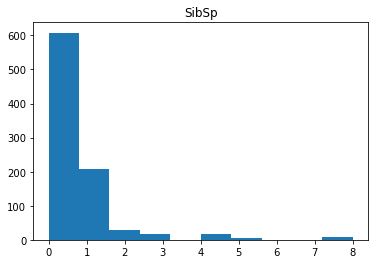

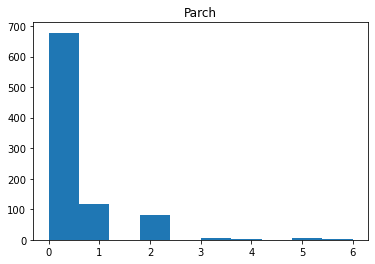

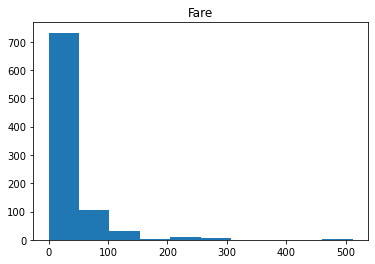

In [39]:
for item in df_num.columns:
    plt.hist(df_num[item])
    plt.title(item)
    plt.show()

## Making Corr Table and Plot

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

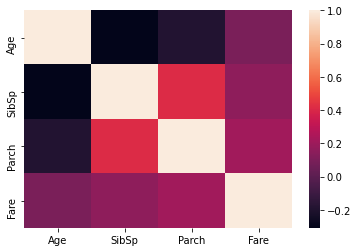

In [41]:
print(df_num.corr())
sns.heatmap(df_num.corr())

## Pivot table comparing survival rate across numeric variables

In [47]:
print(pd.pivot_table(df_train, index = 'Survived', values = df_num.columns))

                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


## Made bar charts to understand balance of classes

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


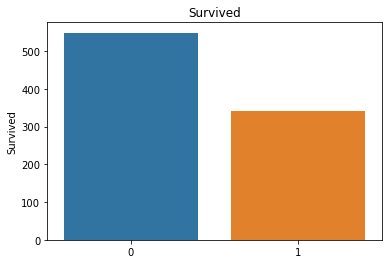

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


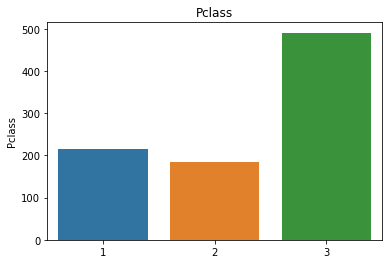

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


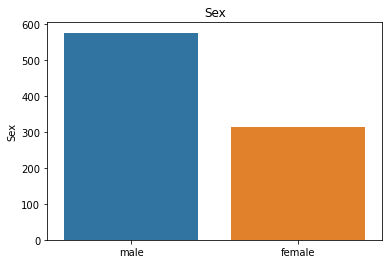

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


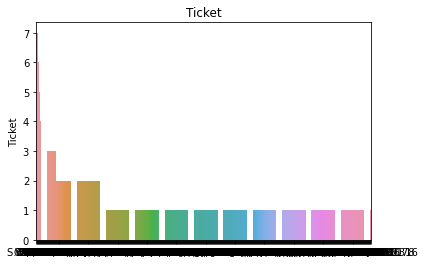

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


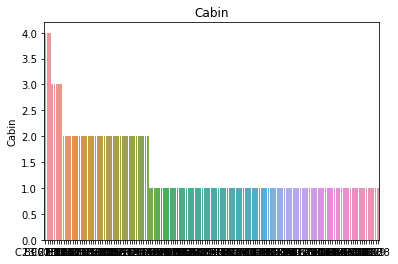

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


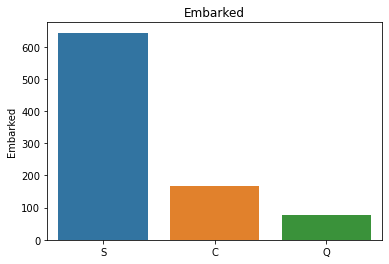

In [46]:
for item in df_cat.columns:
    sns.barplot(df_cat[item].value_counts().index, df_cat[item].value_counts()).set_title(item)
    plt.show()

In [58]:
pd.pivot_table(df_train, index = 'Survived', columns='Sex', values = 'Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [59]:
pd.pivot_table(df_train, index = 'Survived', columns='Pclass', values = 'Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

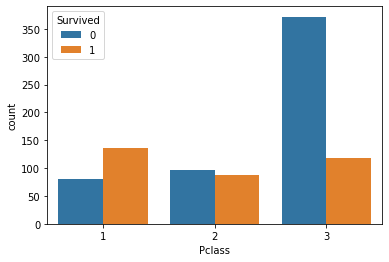

In [118]:
sns.countplot('Pclass',hue = 'Survived', data = df_train)

In [60]:
pd.pivot_table(df_train, index = 'Survived', columns='Embarked', values = 'Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
pd.pivot(df_train, index = 'Survived', columns='Embarked', values = 'Ticket', aggfunc='count').plot(kind)

## Feature Engineering
### Ticket and Cabin column seems messy at this point. We need to give them more meanings.
### Name column seems inrelevant, but prefix might show a person's social status.

In [75]:
pd.isna(df_cat['Cabin']).value_counts()
### there are 687 na for Cabin, we will later turn them into 0.
### for those valid values, cabin will start with class number. So, let's pull out the class info

True     687
False    204
Name: Cabin, dtype: int64

In [114]:
df_train['Cabin_Class'] = df_train['Cabin'].apply(lambda x: 'no class' if pd.isna(x) else str(x)[0])
print(df_train['Cabin_Class'].value_counts())
### there are 8 different kinds of classes for our training dataset

no class    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: Cabin_Class, dtype: int64


In [98]:
### let's take a look at the relationship between cabin class and survival
pd.pivot_table(df_train, index = 'Survived', columns='Cabin_Class', values='Name', aggfunc='count')

Cabin_Class,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survive vs. Cabin Class')

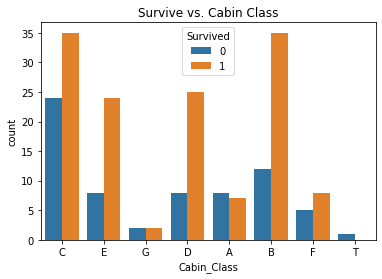

In [119]:
import seaborn as sns
df_cabin_class = df_train.loc[df_train['Cabin_Class']!='no class']
sns.countplot('Cabin_Class', hue = 'Survived', data = df_cabin_class).set_title('Survive vs. Cabin Class')

### there is no na value for Ticket column

In [121]:
pd.isna(df_cat['Ticket']).value_counts()

False    891
Name: Ticket, dtype: int64

### there are 661 entries that have numeric ticket. From the pivot table, whether the ticket is numeric or not does not seem to have effect on survival

In [127]:
df_train['Ticket_numeric'] = df_cat['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
print(df_train['Ticket_numeric'].value_counts())
pd.pivot_table(df_train, index = 'Survived', columns = 'Ticket_numeric', values = 'Name', aggfunc='count')

1    661
0    230
Name: Ticket_numeric, dtype: int64


Ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


### Let's also explore the prefix value before the number when the ticket is not numeric value. But we need to clean the prefix before we can actually use it

In [125]:
df_train.loc[df_train['Ticket_numeric']==0]['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
10              PP 9549
12            A/5. 2151
             ...       
867            PC 17590
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 230, dtype: object

In [130]:
str = 'A/5 cbd 21171'
str.split(' ')[:-1]

['A/5', 'cbd']

In [135]:
df_train['Ticket_prefix'] = df_train['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('/','').replace('.','').lower() if len(x.split(' ')[:-1])>0 else 0)
df_train['Ticket_prefix'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
pp             3
wep            3
scah           2
sotono2        2
ppp            2
swpp           2
scow           1
sop            1
sc             1
sp             1
fc             1
as             1
fa             1
casoton        1
sca4           1
scahbasle      1
Name: Ticket_prefix, dtype: int64

### there does not seem a pattern here to explain the effect of ticket on survival. Therefore, we will not focus on 'Ticket' variable while training our model

In [136]:
pd.pivot_table(df_train, index = 'Survived', columns = 'Ticket_prefix', values = 'Name', aggfunc='count')

Ticket_prefix,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### Last but not least, let's explore the Name column. 

In [139]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [140]:
df_train['Name_prefix'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [141]:
df_train['Name_prefix'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Don               1
Mme               1
Ms                1
Jonkheer          1
Sir               1
Capt              1
Lady              1
Name: Name_prefix, dtype: int64

### we can see that the captain does not survive. The Titanic tends to save more of females' lives since 'Miss' and 'Mrs' have more survives than dead. Master also survived more than dead. Slavery still exists at that time and I believe masters will have more chance to survive since they lived in higher cabin classes. 

In [142]:
pd.pivot_table(df_train,  index = 'Survived', columns = 'Name_prefix', values = 'Name', aggfunc='count')

Name_prefix,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0
